In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
print(tv_projects)

['cate_task_data', 'COT_cannula_data', 'COT_test_data', 'visual_and_COT_data']


In [3]:
selected_project = tv_projects[3]

In [4]:
animals = utils.get_animals_in_project(selected_project)
print(animals)

['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010', 'punish_test', 'test', 'test2']


In [5]:
animals_to_remove = ['test', 'test2', 'punish_test']
animals = [animal for animal in animals if animal not in animals_to_remove]
print(f"Animals in project {selected_project}: {animals}")
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(selected_project) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_cluster_data(
        project_name=selected_project,
        file_path="sessions/{}/{}.csv".format(mouse, mouse),
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

Animals in project visual_and_COT_data: ['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010']
receiving incremental file list
ACV001.csv

sent 161,275 bytes  received 4,130,983 bytes  175,194.20 bytes/sec
total size is 553,938,026  speedup is 129.06
receiving incremental file list
ACV002.csv

sent 154,646 bytes  received 1,460,744 bytes  87,318.38 bytes/sec
total size is 495,635,722  speedup is 306.82
receiving incremental file list
ACV003.csv

sent 160,428 bytes  received 1,855,840 bytes  85,798.64 bytes/sec
total size is 535,186,755  speedup is 265.43
receiving incremental file list
ACV004.csv

sent 148,192 bytes  received 1,124,906 bytes  87,799.86 bytes/sec
total size is 453,793,098  speedup is 356.45
receiving incremental file list
ACV005.csv

sent 140,499 bytes  received 4,030,980 bytes  203,486.78 bytes/sec
total size is 425,198,507  speedup is 101.93
receiving incremental file list
ACV006.csv

sent 158,272 bytes  received 177,139 b

In [6]:
df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(selected_project) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_1806/2624901104.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [7]:
df = dft.analyze_df(df)
print("Dataframe analyzed.")

Dataframe analyzed.


In [8]:
# selection of periods of stable behavior
# remove data from the 2nd to the 7th of July
df_clean = df[(df['date'] < '2025-07-02') | (df['date'] > '2025-07-07')]
# remove the date from 20th to 22nd of June due to port2 overdetections
df_clean = df_clean[(df_clean['date'] < '2025-06-20') | (df_clean['date'] > '2025-06-22')]
# remove the data after the 21st of July
df_clean = df_clean[df_clean['date'] < '2025-07-21']

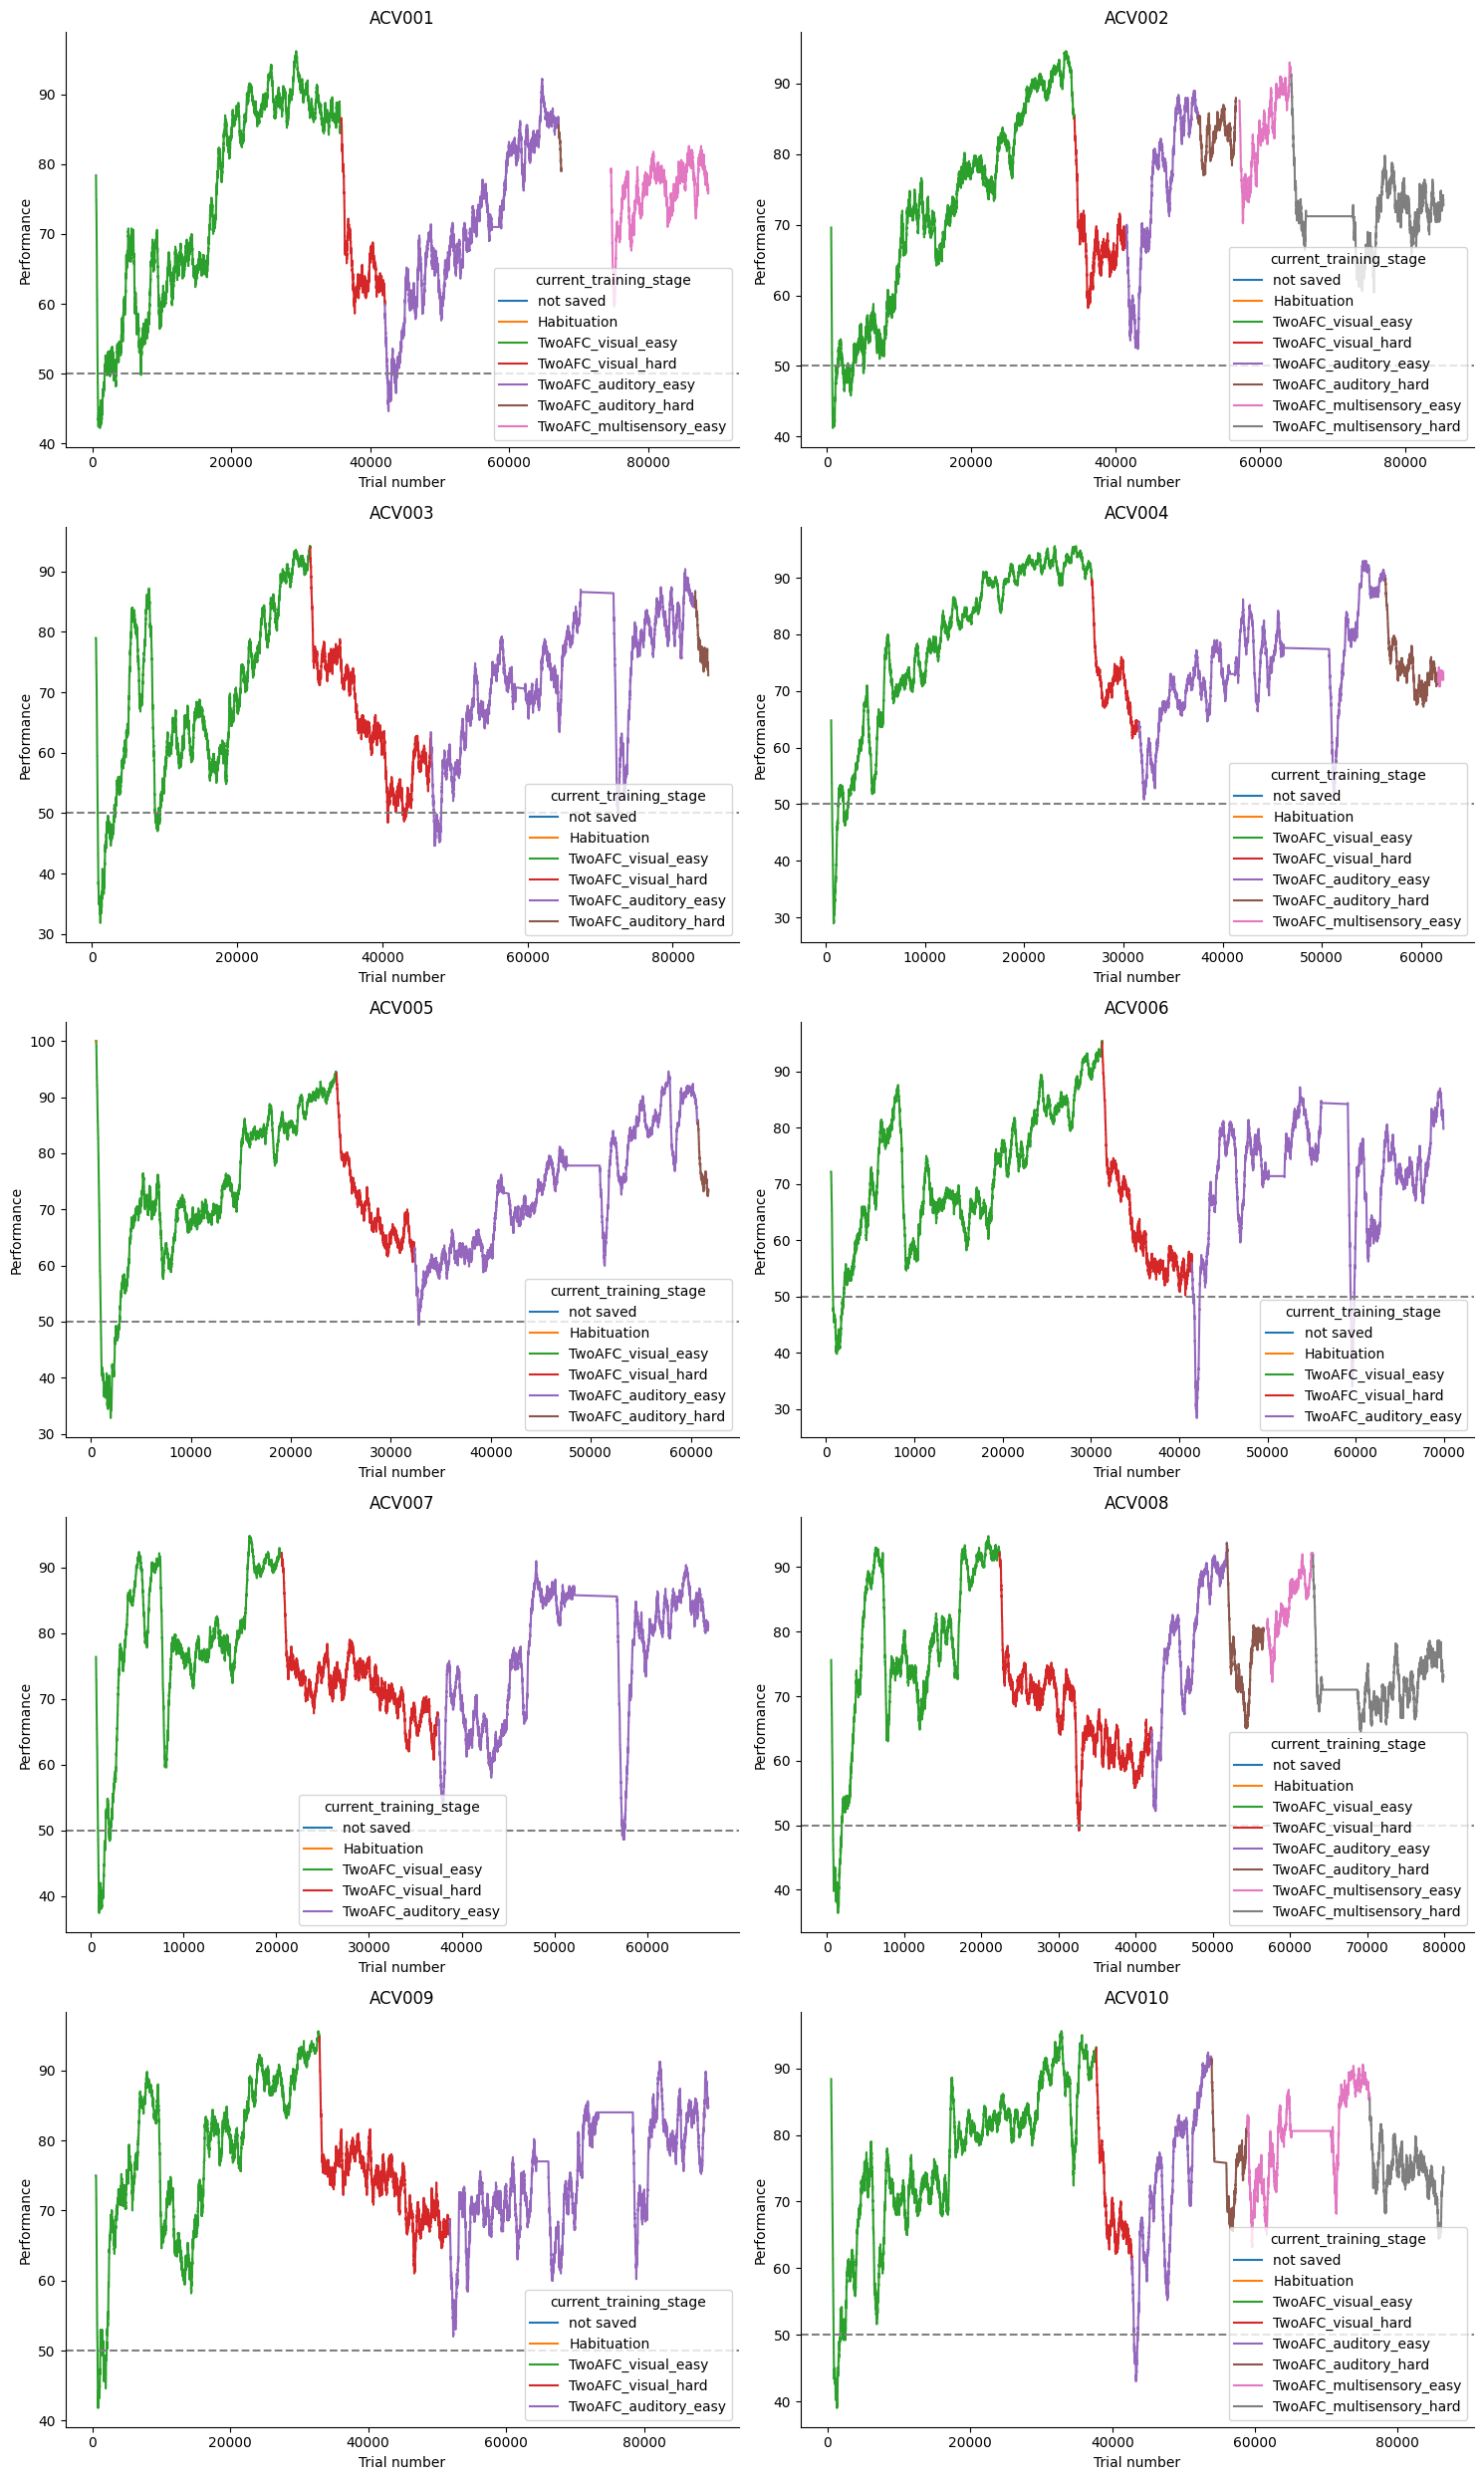

In [10]:
# plot the performance for each animal by training stage
ncols = 2
nrows = int(np.ceil(len(df_clean.subject.unique()) / ncols))
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axs = axs.ravel()
window = 500  # number of trials to consider for the performance calculation
for i, subject in enumerate(df_clean.subject.unique()):
    ax_perf = axs[i]
    df_subj = df_clean[df_clean['subject'] == subject]
    # get the performance through trials
    df_subj = dft.get_performance_through_trials(df_subj, window=window)
    ax_perf = plots.performance_vs_trials_plot(df_subj, ax=ax_perf, legend=True)
    ax_perf.set_title(f"{subject}")
    ax_perf.set_xlabel('Trial number')
    ax_perf.set_ylabel('Performance')

# remove the empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

In [39]:
# select only the first 5000 trials of visual hard
vis_hard_df_list = []
for subject in df_clean.subject.unique():
    df_subj = df_clean[(df_clean['subject'] == subject) & (df_clean['current_training_stage'] == 'TwoAFC_visual_hard')]
    if len(df_subj) > 5000:
        df_subj = df_subj.iloc[:5000]
    vis_hard_df_list.append(df_subj)

vis_hard_df = pd.concat(vis_hard_df_list, ignore_index=True)

In [8]:
# find if the session was during the night or day
def is_day_session(date: str) -> bool:
    """
    Check if the session is a day session based on the date.
    """
    hour = int(date.split(" ")[1].split(":")[0])
    return 8 <= hour < 19  # Daytime is considered from 8 AM to 8 PM


In [40]:

vis_hard_df['is_day_session'] = vis_hard_df['date'].apply(is_day_session)

In [13]:
# save to a csv file
df_to_save = vis_hard_df.groupby(["subject", "difficulty", "is_day_session"]).agg({
    "correct": "mean",
    "trial": "size"}).reset_index()

df_to_save.to_csv("figures/visual_discrimination_performance.csv", index=False)

<Axes: xlabel='difficulty', ylabel='correct'>

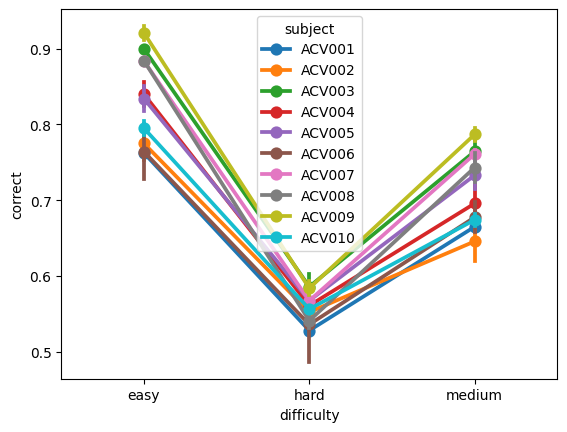

In [14]:
sns.pointplot(data=df_to_save, x='difficulty', y='correct', hue='subject', errorbar='sd')

/tmp/ipykernel_642466/3937422395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aud_hard_df['is_day_session'] = aud_hard_df['date'].apply(is_day_session)


<Axes: xlabel='difficulty', ylabel='correct'>

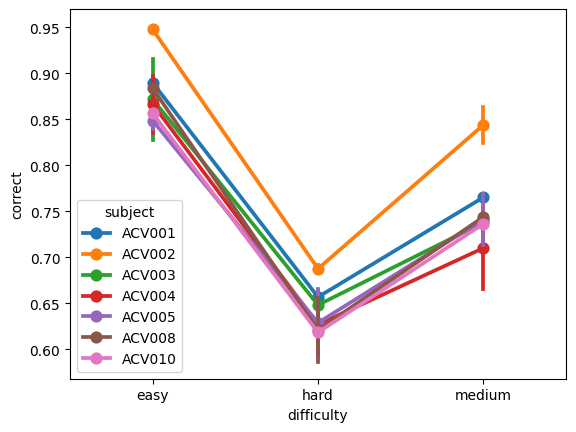

In [41]:
# do the same for the auditory
aud_hard_df = df_clean[df_clean['current_training_stage'] == 'TwoAFC_auditory_hard']
# day or night
aud_hard_df['is_day_session'] = aud_hard_df['date'].apply(is_day_session)
df_to_save = aud_hard_df.groupby(["subject", "difficulty", "is_day_session"]).agg({
    "correct": "mean",
    "trial": "size",
    }).reset_index()
df_to_save.to_csv("figures/auditory_discrimination_performance.csv", index=False)
sns.pointplot(data=df_to_save, x='difficulty', y='correct', hue='subject', errorbar='sd')

Generate the dfs with the trial duration, and those that are engaged or not engaged.

In [42]:
# add trial duration to the dataframes
vis_hard_df = dft.add_trial_duration_column_to_df(vis_hard_df)
aud_hard_df = dft.add_trial_duration_column_to_df(aud_hard_df)

In [55]:
# for engagement vs intersession interval dataset
df_clean = dft.add_trial_duration_column_to_df(df_clean)

In [10]:
# the session duration needs to be computed from the events, not from the sessions_summary_df
# load all the past events data
local_path = Path(utils.get_outpath()) / Path(selected_project)
utils.rsync_cluster_data(
    project_name=selected_project,
    file_path="old_events",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)
utils.rsync_cluster_data(
    project_name=selected_project,
    file_path="events.csv",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)

receiving incremental file list
old_events/

sent 52 bytes  received 365 bytes  166.80 bytes/sec
total size is 21,715,335  speedup is 52,075.14
receiving incremental file list
events.csv

sent 9,073 bytes  received 31,625 bytes  27,132.00 bytes/sec
total size is 2,742,383  speedup is 67.38


True

In [11]:
events_df = utils.load_all_events(project_name=selected_project)

In [49]:
# select a dataframe to run the engagement analysis on
# modality = 'auditory'
# df2afc = aud_hard_df.copy()
modality = 'visual'
df2afc = vis_hard_df.copy()

In [12]:
# or, run it on all the data
df2afc = df_clean.copy()
modality = 'all_data'

In [13]:
# find the end events for all the dates in df2afc using apply method
session_duration_df = df2afc.groupby('date')['subject'].first().reset_index(drop=False)
session_duration_df["end_of_session_result_search"]= session_duration_df.apply(lambda x: utils.find_next_end_task_time_in_events(events_df, x['date'], x['subject']), axis=1)

session_duration_df["end_of_task"] = session_duration_df["end_of_session_result_search"].apply(lambda x: x[0])
session_duration_df["duration"] = session_duration_df["end_of_session_result_search"].apply(lambda x: x[1])
# drop end_of_session_result_search
session_duration_df.drop(columns=["end_of_session_result_search"], inplace=True)

# replace any None entry by a nan
session_duration_df.replace({None: np.nan}, inplace=True)
# drop nans
session_duration_df.dropna(inplace=True)


Subject mismatch for 2025-03-05 14:42:53: expected ACV005, found ACV008.
Subject mismatch for 2025-03-05 15:07:31: expected ACV002, found ACV008.
Subject mismatch for 2025-03-05 16:09:45: expected ACV004, found ACV008.
Subject mismatch for 2025-03-05 17:14:38: expected ACV001, found ACV008.
Subject mismatch for 2025-03-05 19:39:54: expected ACV006, found ACV008.
Subject mismatch for 2025-03-05 20:09:07: expected ACV005, found ACV008.
Subject mismatch for 2025-03-05 20:23:48: expected ACV002, found ACV008.
Subject mismatch for 2025-03-05 22:43:03: expected ACV004, found ACV008.
Subject mismatch for 2025-03-06 00:37:28: expected ACV003, found ACV008.
Subject mismatch for 2025-03-06 00:57:53: expected ACV006, found ACV008.
Subject mismatch for 2025-03-06 04:02:04: expected ACV010, found ACV008.
Subject mismatch for 2025-03-06 07:19:02: expected ACV007, found ACV008.
Subject mismatch for 2025-03-06 07:37:33: expected ACV003, found ACV008.
Subject mismatch for 2025-03-06 08:15:20: expected 

In [14]:
engagement_sd_criteria = 2
td_vals_dict = {
    'subject': [],
    'median_td_log': [],
    'std_td_log': [],
}
for subject in df2afc['subject'].unique():
    df_mouse = df2afc[df2afc['subject'] == subject]
    # get the median and std of the log of the trial_duration
    df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
    median_td_log = df_mouse['td_log'].median()
    std_td_log = df_mouse['td_log'].std()

    # store the median and std in the td_vals_dict
    td_vals_dict['subject'].append(subject)
    td_vals_dict['median_td_log'].append(median_td_log)
    td_vals_dict['std_td_log'].append(std_td_log)

    # classify trials as engaged or not engaged depending on the td_log
    df_mouse['engaged'] = df_mouse['td_log'] < (median_td_log + engagement_sd_criteria * std_td_log)

    df2afc.loc[df2afc['subject'] == subject, 'engaged'] = df_mouse['engaged']

/tmp/ipykernel_1806/306053702.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
/tmp/ipykernel_1806/306053702.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['engaged'] = df_mouse['td_log'] < (median_td_log + engagement_sd_criteria * std_td_log)
/tmp/ipykernel_1806/306053702.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [15]:
td_vals_df = pd.DataFrame(td_vals_dict)
gsbu_dfs = []
for date in df2afc['date'].unique():
    if date not in session_duration_df['date'].values:
        print(f"Date {date} not found in session_duration_df. Skipping.")
        continue
    else:
        duration = session_duration_df.loc[session_duration_df['date'] == date, 'duration'].values[0]
        df_session = df2afc[df2afc['date'] == date]
    gsbu = utils.get_session_box_usage(df_session, session_duration=duration)
    # add if the session was during the day or not
    gsbu['is_day_session'] = is_day_session(date)
    # add the number of the session
    gsbu['session_number'] = df_session.session.values[0]
    # add the total number of trials in the session
    gsbu['total_trials'] = len(df_session)
    # add the water consumption
    gsbu['total_water_consumed'] = df_session['water'].sum()
    # add the current training stage
    gsbu['current_training_stage'] = df_session['current_training_stage'].values[0]
    # duration
    gsbu['session_duration'] = duration
    # end of task
    gsbu['end_of_task'] = session_duration_df.loc[session_duration_df['date'] == date, 'end_of_task'].values[0]
    gsbu_dfs.append(gsbu)
gsbu_df = pd.concat(gsbu_dfs, ignore_index=True)

Date 2025-03-05 17:14:38 not found in session_duration_df. Skipping.
Date 2025-03-07 01:39:11 not found in session_duration_df. Skipping.
Date 2025-03-12 07:58:54 not found in session_duration_df. Skipping.
Date 2025-04-02 08:44:36 not found in session_duration_df. Skipping.
Date 2025-03-05 15:07:31 not found in session_duration_df. Skipping.
Date 2025-03-05 20:23:48 not found in session_duration_df. Skipping.
Date 2025-03-06 08:15:20 not found in session_duration_df. Skipping.
Date 2025-03-06 13:33:07 not found in session_duration_df. Skipping.
Date 2025-03-06 23:32:10 not found in session_duration_df. Skipping.
Date 2025-03-07 04:10:03 not found in session_duration_df. Skipping.
Date 2025-03-06 00:37:28 not found in session_duration_df. Skipping.
Date 2025-03-06 07:37:33 not found in session_duration_df. Skipping.
Date 2025-09-15 15:16:11 not found in session_duration_df. Skipping.
Date 2025-03-05 16:09:45 not found in session_duration_df. Skipping.
Date 2025-03-05 22:43:03 not found

In [26]:
# get the mean by subject
gsbu_df_mean = gsbu_df.groupby(['subject', 'time_type', 'is_day_session']).aggregate({
    'percentage_of_time': 'mean',
}).reset_index()

In [31]:
# save the dataframes to a csv file
gsbu_df_mean.to_csv(f"figures/box_usage_{modality}.csv", index=False)

In [53]:
df2afc[['subject', 'session', 'trial', 'total_trial', 'trial_duration', 'engaged', 'is_day_session', 'date', 'correct', 'difficulty']].to_csv(f"figures/trial_duration_{modality}.csv", index=False)

In [60]:
# Pivot the dataframe to transform 'time_type' categories into columns
pivoted_df = gsbu_df.pivot(index=['subject', 'date', 'is_day_session', 'session_number', 'total_trials', 'total_water_consumed', 'accuracy', 'current_training_stage', 'session_duration', 'end_of_task'],
                           columns='time_type',
                           values='percentage_of_time').reset_index()

pivoted_df

time_type,subject,date,is_day_session,session_number,total_trials,total_water_consumed,accuracy,current_training_stage,session_duration,end_of_task,disengaged_time,engaged_time,time_to_complete_first_trial,time_to_exit_box,unaccounted_time
0,ACV001,2025-03-10 10:56:57,True,3.0,9,45.0,NaN,not saved,751.0,2025-03-10 11:09:28,95.883196,0.003675,0.001838,4.103211,0.008081
1,ACV001,2025-03-10 16:57:01,True,4.0,11,55.0,NaN,not saved,993.0,2025-03-10 17:13:34,96.687855,0.002779,0.001390,3.300961,0.007015
2,ACV001,2025-03-11 02:20:25,False,5.0,18,90.0,NaN,not saved,2230.0,2025-03-11 02:57:35,80.460543,0.001238,0.000619,19.532226,0.005375
3,ACV001,2025-03-11 21:47:25,False,6.0,16,80.0,100.000000,Habituation,1257.0,2025-03-11 22:08:22,90.617764,0.002196,0.001098,9.369814,0.009128
4,ACV001,2025-03-12 02:18:44,False,7.0,11,55.0,100.000000,Habituation,1008.0,2025-03-12 02:35:32,90.535149,0.002738,0.001369,9.454330,0.006414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,ACV010,2025-07-20 10:50:15,True,526.0,39,60.0,76.923077,TwoAFC_multisensory_hard,456.0,2025-07-20 10:57:51,8.632763,41.526031,2.853246,45.327080,1.660880
4181,ACV010,2025-07-20 11:29:10,True,527.0,131,208.0,79.389313,TwoAFC_multisensory_hard,700.0,2025-07-20 11:40:50,6.593357,83.007943,4.762157,3.589499,2.047044
4182,ACV010,2025-07-20 18:26:07,True,528.0,2,4.0,100.000000,TwoAFC_multisensory_hard,72.0,2025-07-20 18:27:19,0.000000,8.689445,83.034167,8.008518,0.267871
4183,ACV010,2025-07-20 20:35:13,False,529.0,244,356.0,72.950820,TwoAFC_multisensory_hard,1401.0,2025-07-20 20:58:34,18.578929,77.832355,0.668337,0.664355,2.256023


In [61]:
# save the dataframes to a csv file
pivoted_df.to_csv(f"figures/box_usage_{modality}.csv", index=False)